In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


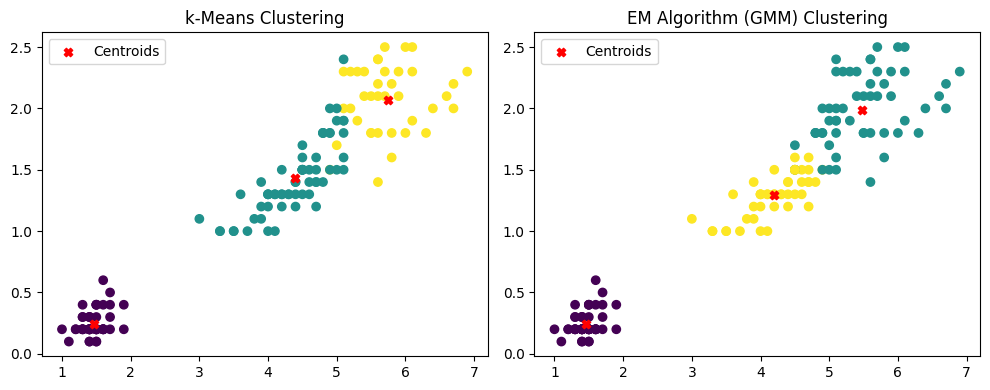

In [2]:
# Load the Iris dataset from the CSV file
path = "/content/drive/MyDrive/A_ML_LAB/7_K-MEANS/iris.csv"
data = pd.read_csv(path)

X = data.iloc[:, :-1].values  # Features: sepal length, sepal width, petal length, petal width

def kmeans(X, K, max_iters):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], K, replace=False), :]

    for _ in range(max_iters):
        # Assign each data point to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(K):
            centroids[i] = np.mean(X[labels == i], axis=0)

    return labels, centroids

def estimate_gaussian(X):
    mu = np.mean(X, axis=0)
    sigma = np.cov(X.T)
    return mu, sigma

def compute_prob(x, mu, sigma):
    d = mu.shape[0]
    inv_sigma = np.linalg.inv(sigma)
    det_sigma = np.linalg.det(sigma)
    exp_term = np.exp(-0.5 * np.dot(np.dot((x - mu), inv_sigma), (x - mu).T))
    return (1 / np.sqrt((2 * np.pi) ** d * det_sigma)) * exp_term

def em_algorithm(X, K, max_iters):
    n, d = X.shape

    # Initialize parameters randomly
    np.random.seed(0)
    pi = np.random.rand(K)
    pi /= np.sum(pi)
    mu = X[np.random.choice(n, K, replace=False), :]
    sigma = np.repeat(np.identity(d)[np.newaxis, :, :], K, axis=0)

    for _ in range(max_iters):
        # E-step: Compute responsibilities
        gamma = np.zeros((n, K))
        for i in range(n):
            for j in range(K):
                gamma[i, j] = pi[j] * compute_prob(X[i], mu[j], sigma[j])
            gamma[i] /= np.sum(gamma[i])

        # M-step: Update parameters
        Nk = np.sum(gamma, axis=0)
        pi = Nk / n
        for j in range(K):
            mu[j] = np.dot(gamma[:, j], X) / Nk[j]
            sigma[j] = np.dot((X - mu[j]).T, np.dot(np.diag(gamma[:, j]), (X - mu[j]))) / Nk[j]

    return np.argmax(gamma, axis=1), mu

# Set the number of clusters and maximum iterations
K = 3
max_iters = 100

# Apply k-Means algorithm
kmeans_labels, kmeans_centroids = kmeans(X, K, max_iters)

# Apply EM algorithm
em_labels, em_centroids = em_algorithm(X, K, max_iters)

# Plot the results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 2], X[:, 3], c=kmeans_labels)
plt.scatter(kmeans_centroids[:, 2], kmeans_centroids[:, 3], marker='X', color='red', label='Centroids')
plt.title('k-Means Clustering')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 2], X[:, 3], c=em_labels)
plt.scatter(em_centroids[:, 2], em_centroids[:, 3], marker='X', color='red', label='Centroids')
plt.title('EM Algorithm (GMM) Clustering')
plt.legend()

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


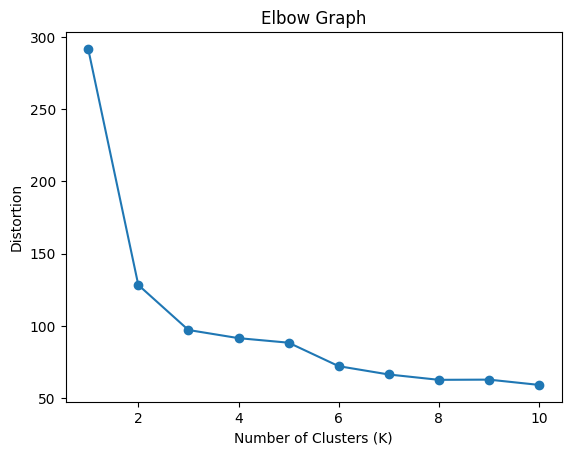

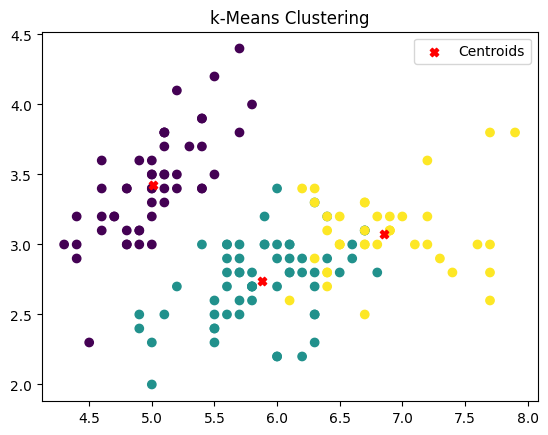

Accuracy: 0.8866666666666667


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
# Load the data
data = pd.read_csv('/content/drive/MyDrive/A_ML_LAB/7_K-MEANS/iris.csv')  # Replace 'your_data.csv' with the path to your CSV file

# Extract features
X = data.iloc[:, :-1].values  # Features (excluding the last column)
y = data.iloc[:, -1].values  # Ground truth labels

def initialize_centroids(X, K):
    # Randomly initialize centroids
    centroids_indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[centroids_indices]
    return centroids

def assign_clusters(X, centroids):
    # Assign data points to the nearest centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1)
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(X, labels, K):
    # Update centroids based on the mean of assigned data points
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i] = np.mean(X[labels == i], axis=0)
    return centroids

def kmeans(X, K, max_iters):
    # Initialize centroids
    centroids = initialize_centroids(X, K)

    # Iterate until convergence or maximum iterations
    for _ in range(max_iters):
        # Assign clusters
        labels = assign_clusters(X, centroids)

        # Update centroids
        new_centroids = update_centroids(X, labels, K)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

def calculate_accuracy(y_true, y_pred):
    # Calculate accuracy score
    correct = np.sum(y_true == y_pred)
    total = y_true.shape[0]
    accuracy = correct / total
    return accuracy

def plot_clusters(X, labels, centroids):
    # Plot the clusters and centroids
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', label='Centroids')
    plt.title('k-Means Clustering')
    plt.legend()
    plt.show()

def elbow_graph(X, max_clusters):
    # Generate elbow graph to find optimal cluster K
    distortions = []
    for k in range(1, max_clusters+1):
        labels, centroids = kmeans(X, k, max_iters=100)
        distortion = np.sum(np.linalg.norm(X - centroids[labels], axis=1))
        distortions.append(distortion)

    # Plot elbow graph
    plt.plot(range(1, max_clusters+1), distortions, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Distortion')
    plt.title('Elbow Graph')
    plt.show()

# Set the maximum number of clusters to try
max_clusters = 10

# Generate elbow graph to find optimal cluster K
elbow_graph(X, max_clusters)

# Choose the optimal cluster K based on the elbow graph
K = 3  # Replace with the chosen optimal K

# Apply k-Means clustering
labels, centroids = kmeans(X, K, max_iters=100)

# Plot the final clusters and centroids
plot_clusters(X, labels, centroids)

# Calculate and print the accuracy score
accuracy = calculate_accuracy(y, labels)
print('Accuracy:', accuracy)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


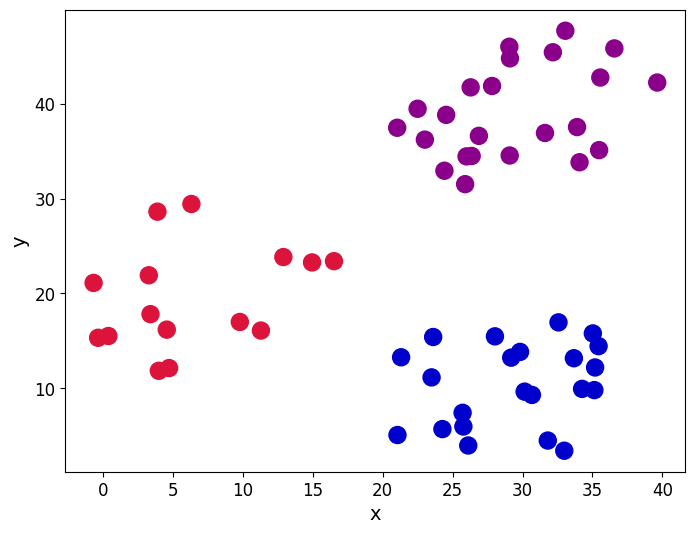

Error for centroid 0: 384.22
Error for centroid 1: 724.64
Error for centroid 2: 0.00


<ipython-input-4-d6eae5d3b01f>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['centroid'], df['error'] = centroid_assignation(df, centroids)


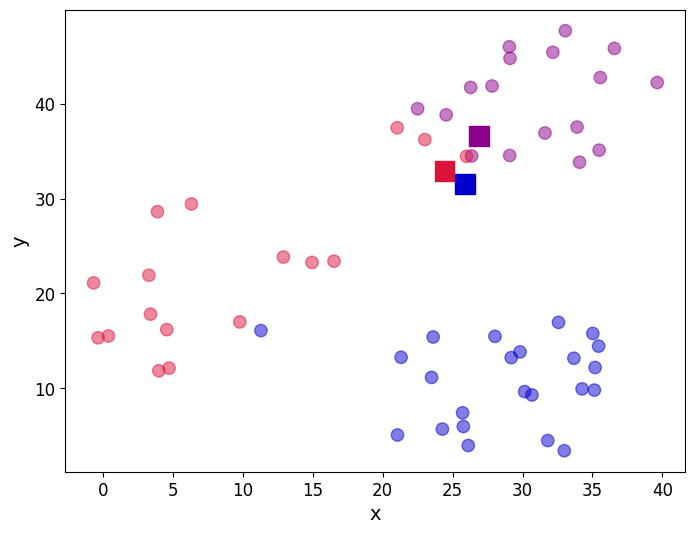

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
blobs = pd.DataFrame(data=pd.read_csv('/content/drive/MyDrive/A_ML_LAB/7_K-MEANS/kmeans_blobs.csv'))
colnames = list(blobs.columns[1:-1])
blobs.head()
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=blobs['x'], y=blobs['y'], s=150,
            c=blobs['cluster'].astype('category'),
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
def initiate_centroids(k, dset):
    '''
    Select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)
centroids
def rsserr(a,b):
    '''
    Calculate the root of sum of squared errors.
    a and b are numpy arrays
    '''
    return np.square(np.sum((a-b)**2))
for i, centroid in enumerate(range(centroids.shape[0])):
    err = rsserr(centroids.iloc[centroid,:], df.iloc[36,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))
def centroid_assignation(dset, centroids):
    '''
    Given a dataframe `dset` and a set of `centroids`, we assign each
    data point in `dset` to a centroid.
    - dset - pandas dataframe with observations
    - centroids - pa das dataframe with centroids
    '''
    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []

    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            err = rsserr(centroids.iloc[centroid, :], dset.iloc[obs,:])
            all_errors = np.append(all_errors, err)

        # Get the nearest centroid and the error
        nearest_centroid =  np.where(all_errors==np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)

    return assignation, assign_errors
df['centroid'], df['error'] = centroid_assignation(df, centroids)
df.head()
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [5]:
print("The total error is {0:.2f}".format(df['error'].sum()))

The total error is 11927659.01


In [6]:
centroids = df.groupby('centroid').agg('mean').loc[:, colnames].reset_index(drop = True)
centroids

,x,y
0,9.889444,23.242611
1,28.435750,11.546250
2,30.759333,40.311167


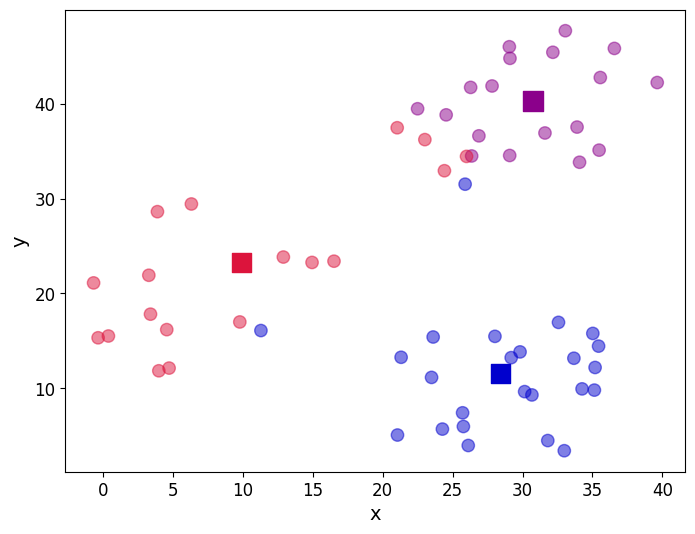

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200,
            c=[0, 1, 2], cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
def kmeans(dset, k=2, tol=1e-4):
    '''
    K-means implementationd for a
    `dset`:  DataFrame with observations
    `k`: number of clusters, default k=2
    `tol`: tolerance=1E-4
    '''
    # Let us work in a copy, so we don't mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the iterations
    err = []
    goahead = True
    j = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)

    while(goahead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
        err.append(sum(j_err))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)

        # Step 6 - Restart the iteration
        if j>0:
            # Is the error less than a tolerance (1E-4)
            if err[j-1]-err[j]<=tol:
                goahead = False
        j+=1

    working_dset['centroid'], j_err = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop = True)
    return working_dset['centroid'], j_err, centroids

In [9]:
np.random.seed(42)
df['centroid'], df['error'], centroids =  kmeans(df[['x','y']], 3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,3767.568743
1,35.190,12.189,1,1399.889001
2,26.288,41.718,2,262.961097
3,0.376,15.506,0,2683.086425
4,26.116,3.963,1,2723.650198


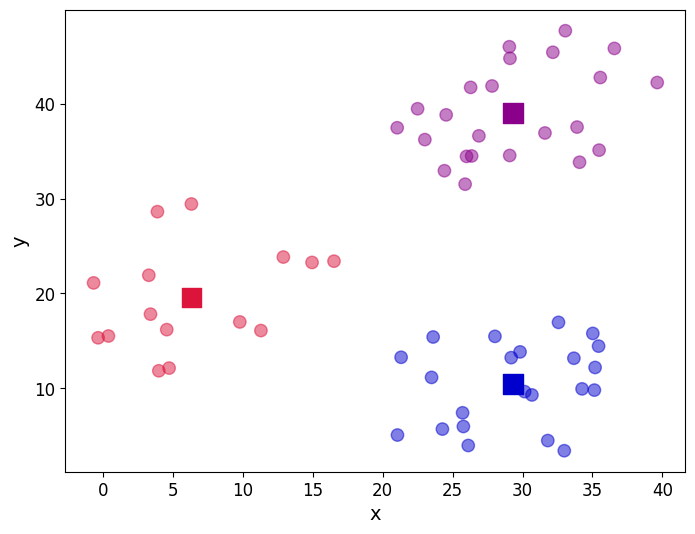

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(df.iloc[:,0], df.iloc[:,1],  marker = 'o',
            c=df['centroid'].astype('category'),
            cmap = customcmap, s=80, alpha=0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],
            marker = 's', s=200, c=[0, 1, 2],
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

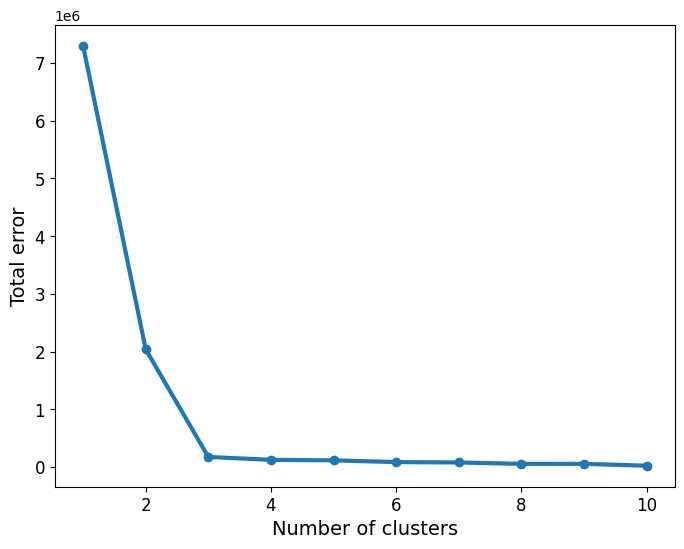

In [11]:
err_total = []
n = 10

df_elbow = blobs[['x','y']]

for i in range(n):
    _, my_errs, _ = kmeans(df_elbow, i+1)
    err_total.append(sum(my_errs))
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,n+1), err_total, linewidth=3, marker='o')
ax.set_xlabel(r'Number of clusters', fontsize=14)
ax.set_ylabel(r'Total error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()